<a href="https://colab.research.google.com/github/disturbed-mystic1/DSC-253-Project/blob/main/ROUGE_BLEU_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction
import numpy as np

bleu_scores = []
references = []
candidates = []

for i,item in enumerate(test_dataset):
    question = item['question']
    true_answer = item['answer']
    context = item['context']

    retrieved_context = retrieve_context(question)  # Context retrieval
    generated_response = inference(question, retrieved_context)  # Inference
    parsed_response = extract_response(generated_response)  # Parsing response

    reference = [true_answer.split()] if true_answer else [] # Tokenized reference answer
    candidate = parsed_response.split() if parsed_response else [] # Tokenized model response
    references.append(reference)
    candidates.append(candidate)

    print(f"{i}")



In [3]:
!pip install rouge-score

In [1]:
from rouge_score import rouge_scorer
import numpy as np

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores for the dataset
rouge_scores = []
for reference, candidate in zip(references, candidates):
    # Convert reference and candidate back to strings for ROUGE computation
    reference_text = " ".join(reference[0]) if reference else ""
    candidate_text = " ".join(candidate) if candidate else ""

    if reference_text and candidate_text:
        scores = scorer.score(reference_text, candidate_text)
        rouge_scores.append(scores)

# Compute average ROUGE scores
average_rouge_scores = {
    "rouge1": np.mean([score['rouge1'].fmeasure for score in rouge_scores]),
    "rouge2": np.mean([score['rouge2'].fmeasure for score in rouge_scores]),
    "rougeL": np.mean([score['rougeL'].fmeasure for score in rouge_scores]),
}

# Display the results
print(f"Average ROUGE Scores: {average_rouge_scores}")


In [2]:
smooth_fn = SmoothingFunction().method1
# weights = (0.25, 0.25, 0.25, 0.25)
weights = (0.3, 0.7, 0, 0 )
corpus_bleu_score = corpus_bleu(references, candidates, weights=weights, smoothing_function=smooth_fn)
print(f"Corpus BLEU Score on test dataset: {corpus_bleu_score:.4f}")

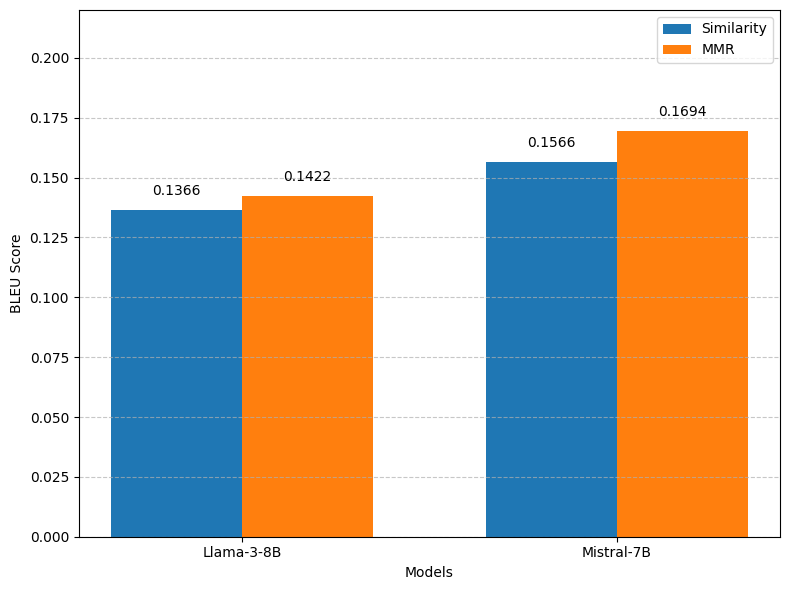

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Llama-3-8B', 'Mistral-7B']
similarity_scores = [0.1366, 0.1566]
mmr_scores = [0.1422, 0.1694]

# Bar width and positions
x = np.arange(len(models))
bar_width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - bar_width / 2, similarity_scores, bar_width, label='Similarity', )
bars2 = ax.bar(x + bar_width / 2, mmr_scores, bar_width, label='MMR', )

# Add text annotations for the scores
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{bar.get_height():.4f}', ha='center', va='bottom')
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{bar.get_height():.4f}', ha='center', va='bottom')

# Customizations
ax.set_xlabel('Models')
ax.set_ylabel('BLEU Score')
ax.set_ylim(0,0.22)
# ax.set_title('BLEU score ')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


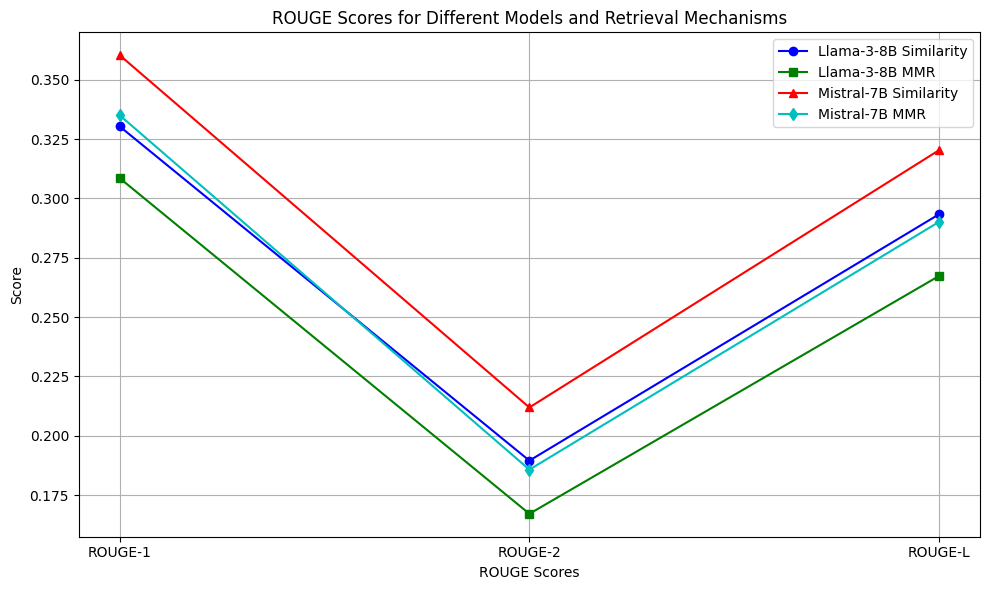

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
rouge_scores = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
llama_similarity = [0.3303, 0.1895, 0.2933]
llama_mmr = [0.3085, 0.1671, 0.2673]
mistral_similarity = [0.3603, 0.2119, 0.3203]
mistral_mmr = [0.3350, 0.1857, 0.2901]

# Create an x-axis range based on the number of ROUGE scores
x = np.arange(len(rouge_scores))

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot lines for each model/retrieval combination
plt.plot(rouge_scores, llama_similarity, label='Llama-3-8B Similarity', marker='o', color='b')
plt.plot(rouge_scores, llama_mmr, label='Llama-3-8B MMR', marker='s', color='g')
plt.plot(rouge_scores, mistral_similarity, label='Mistral-7B Similarity', marker='^', color='r')
plt.plot(rouge_scores, mistral_mmr, label='Mistral-7B MMR', marker='d', color='c')

# Add grid, title, labels, and legend
plt.grid(True)
plt.title('ROUGE Scores for Different Models and Retrieval Mechanisms')
plt.xlabel('ROUGE Scores')
plt.ylabel('Score')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
